In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

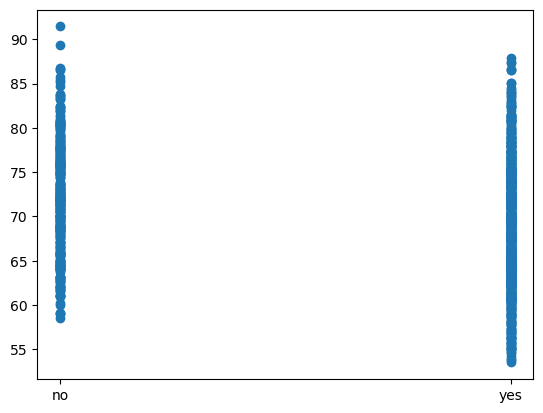

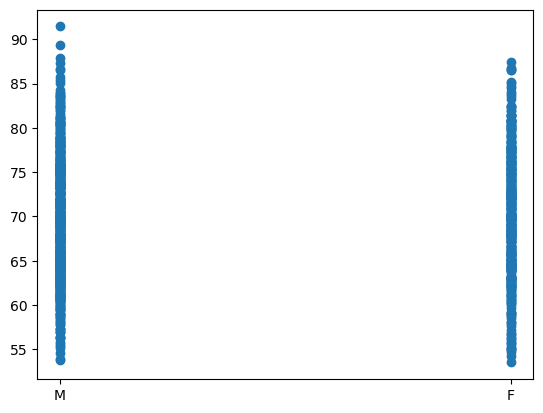

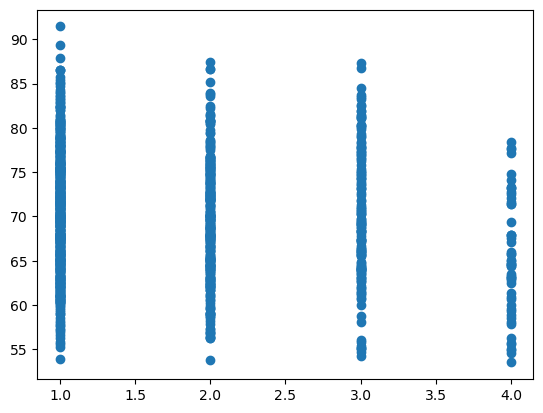

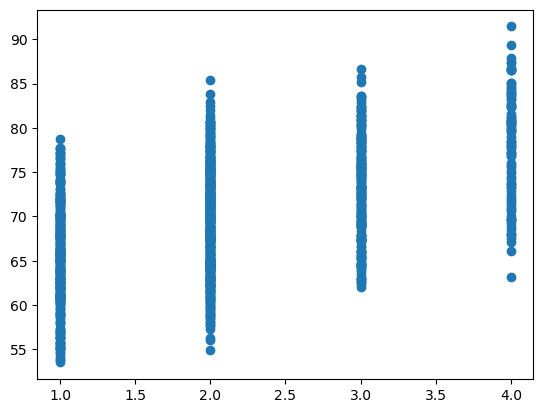

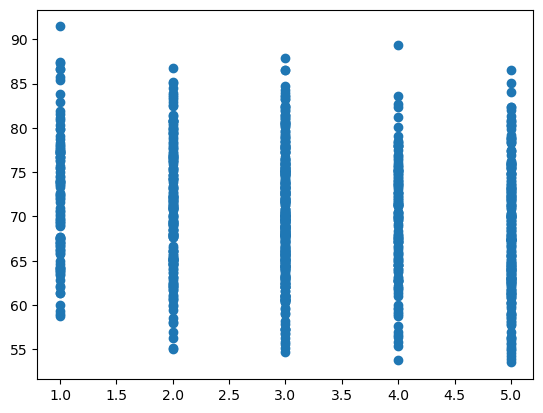

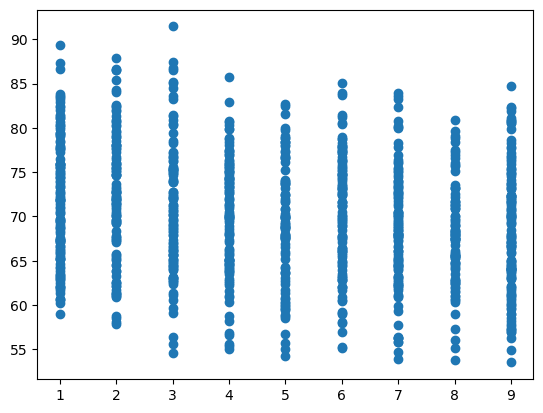

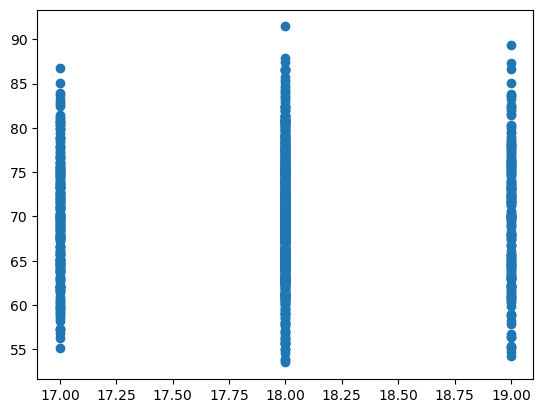

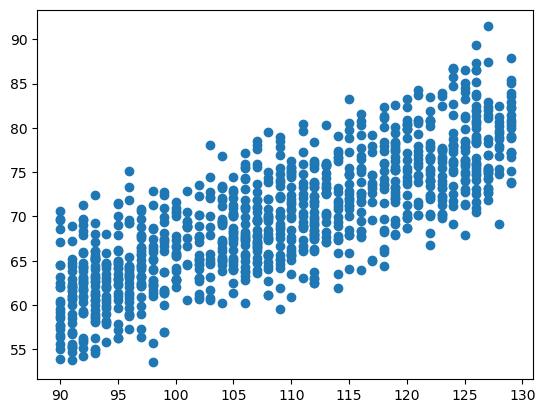

[[0 1 2 ... 6 18 118]
 [1 1 2 ... 7 19 107]
 [1 1 3 ... 5 18 108]
 ...
 [1 1 2 ... 5 17 123]
 [1 0 1 ... 8 17 104]
 [1 1 1 ... 6 18 128]]


In [116]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
plt.scatter(x_train[:,0],y_train)
plt.show()

plt.scatter(x_train[:,1],y_train)
plt.show()

plt.scatter(x_train[:,2],y_train)
plt.show()

plt.scatter(x_train[:,3],y_train)
plt.show()

plt.scatter(x_train[:,4],y_train)
plt.show()

plt.scatter(x_train[:,5],y_train)
plt.show()

plt.scatter(x_train[:,6],y_train)
plt.show()

plt.scatter(x_train[:,7],y_train)
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  x_train[x_train == 'F'] = 0
  x_train[x_train == 'M'] = 1
  x_train[x_train == 'yes'] = 1
  x_train[x_train == 'no'] = 0
  return x_train

x_train = feature_changing(x_train)
print(x_train)

N = x_train.shape[0]

In [117]:
def z_score(x_train):
  x_train = x_train.astype(np.float64)
  x_mean = x_train.mean(axis = 0)
  x_std = x_train.mean(axis = 0)
  x_train = (x_train - x_mean)/x_std
  return x_train,x_std,x_mean

In [118]:
def cost(x_train,y_train,w,b):
  loss = np.square((w.T*x_train).sum(axis = 1).reshape(-1,1) + b - y_train).sum()/(2*N)
  return loss

In [119]:
def dw(x_train,y_train,w,b):
	return (((w.T*x_train).sum(axis = 1).reshape(-1,1) + b - y_train).reshape(-1,1)*x_train).sum(axis = 0).reshape(-1,1)/N

def db(x_train,y_train,w,b):
	return ((w.T*x_train).sum(axis = 1).reshape(-1,1) + b - y_train).sum()/N

In [120]:
def gradient_descent(x_train,y_train,w,b):
  learning_rate = 0.01

  temp_w = w - learning_rate*dw(x_train,y_train,w,b)
  temp_b = b - learning_rate*db(x_train,y_train,w,b)
  
  return temp_w,temp_b

In [121]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0
costs = []

while abs(old_cost - cost(x_train,y_train,w,b))>0.0000001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
  costs.append(old_cost)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%


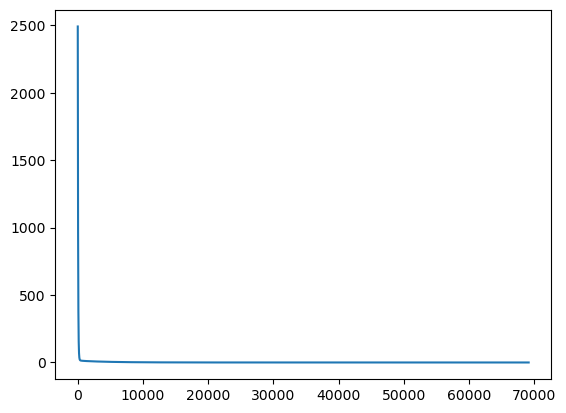

In [122]:
plt.plot(costs)
plt.show()